Generating and saving all classification results for this database...
Generating and saving Figure 1...


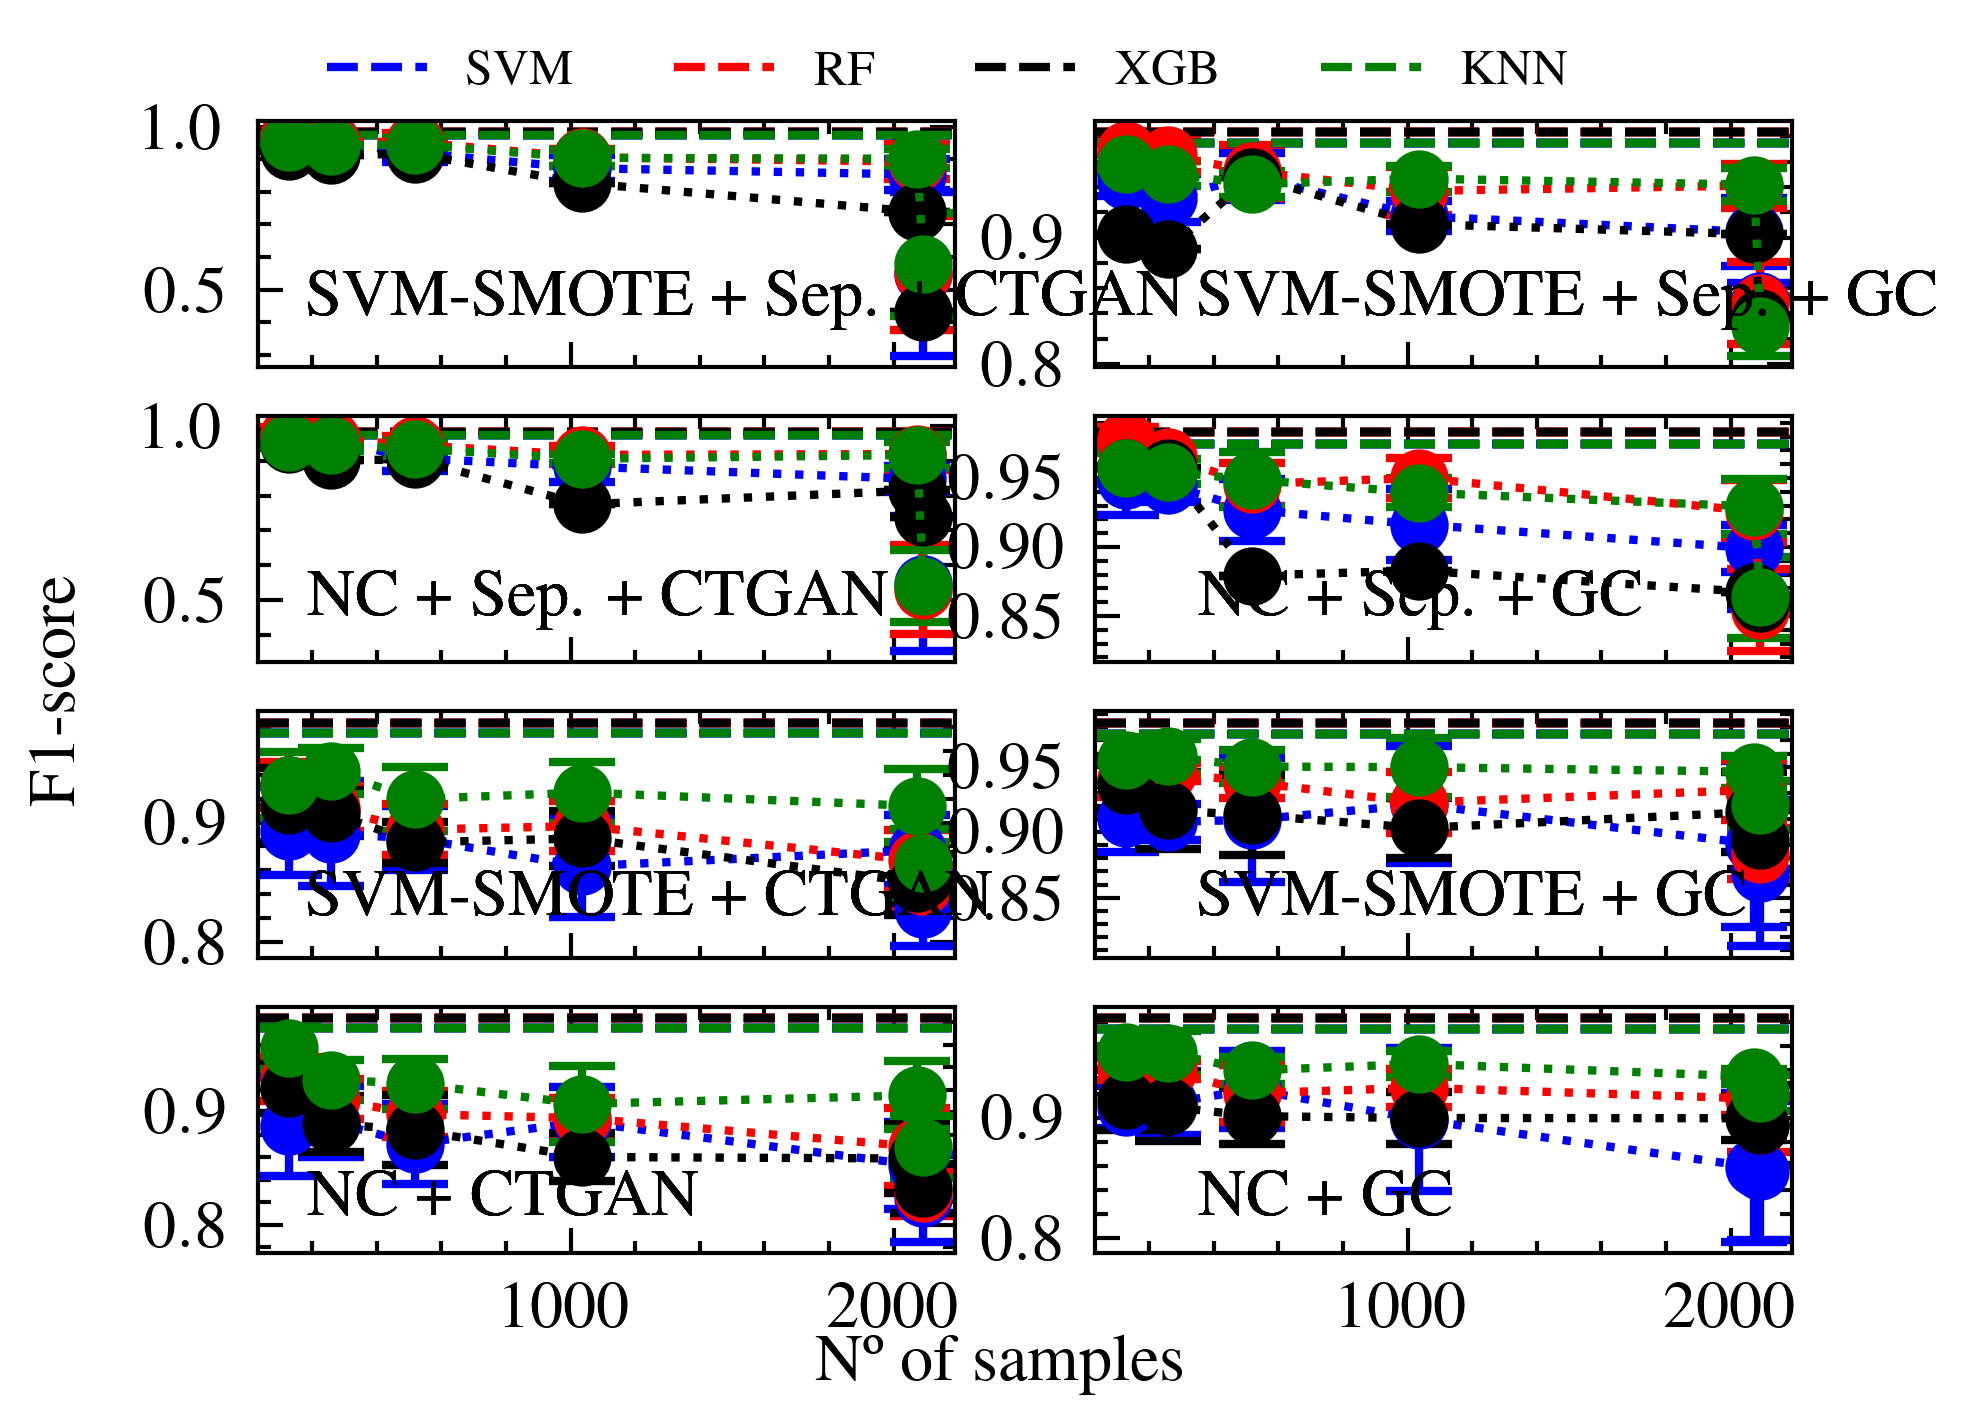

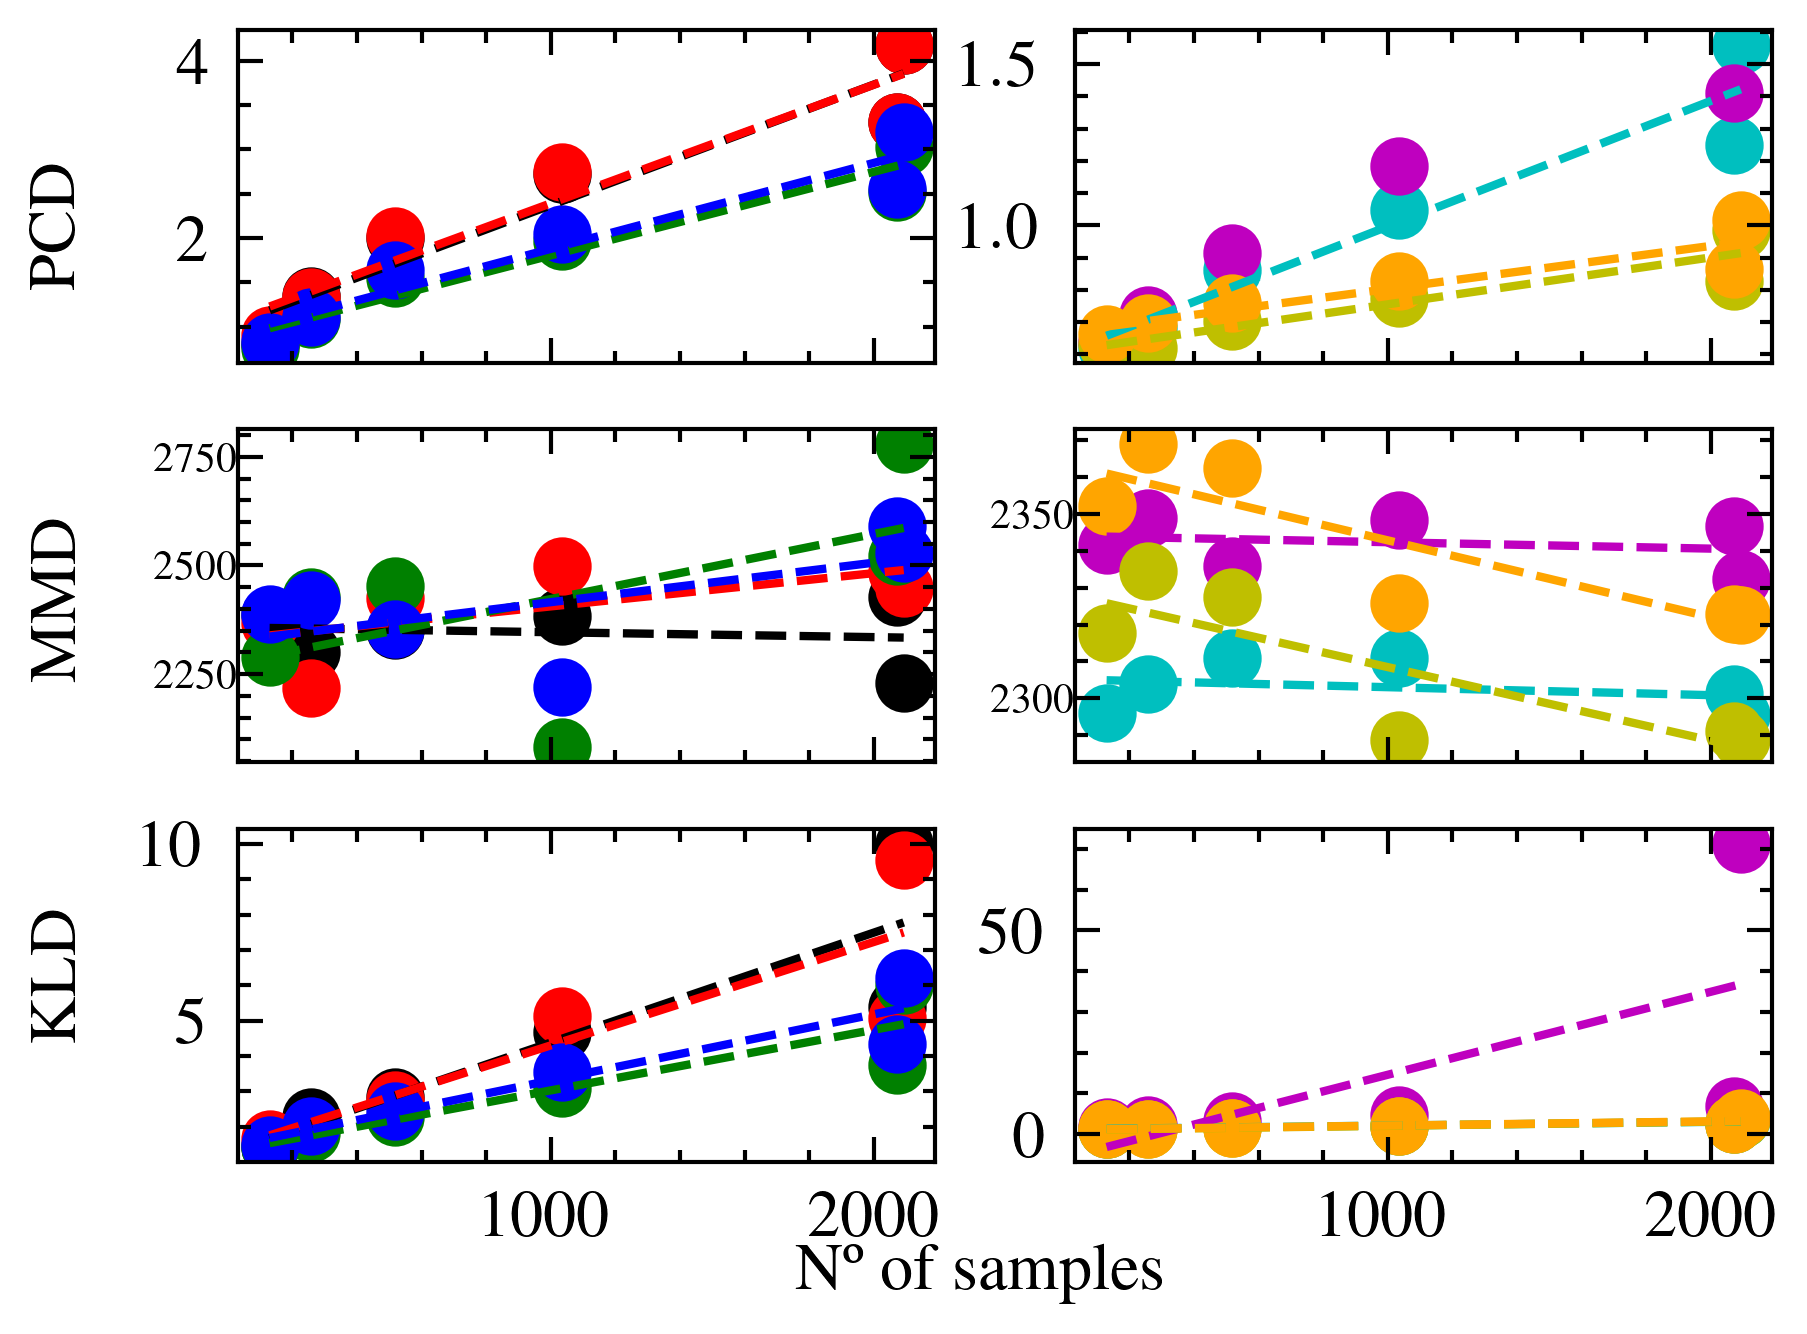

In [2]:
import pickle
import matplotlib.pyplot as plt 
import numpy as np 
import os 

############################################ ARGUMENTS #####################################

# Path where directories are stored
DICT_PATH = r"C:\Users\aralmeida\OneDrive - Universidad de Las Palmas de Gran Canaria\Doctorado\codigo\synthetic_data_generation_framework\EarlyDM\results"

dataset_name = 'Early-DM'

# Variables needed to handle dictionaries (same as )
# Number of generated data samples 
sizes_keys = ["quarter", "half", "unit", "double", "quadruple", "only-synth"]

# Balancing Methods 
balance1 = "NC"
balance2 = "SVM-SMOTE"

# Augmentation methods
augmen1 = "CTGAN"
augmen2 = "GC"

best_worst = ['NC + CTGAN'] 

models = ['SVM','RF', 'XGB', 'KNN']

model_colors = ['b','r','k','g']

# Chosen colors for each combinations
ctgan_colors = ["k","r","g","b"]
gc_colors = ["c","m","y","orange"]

# Studied metrics
mets = ["PCD","MMD","KLD"]

# Strings containing combinations of SDG (Synthetic Data Generators) 
comb1 = ("%s + %s") % (balance1, augmen1)
comb2 = ("%s + %s") % (balance1, augmen2)
comb3 = ("%s + %s") % (balance2, augmen1)
comb4 = ("%s + %s") % (balance2, augmen2)
comb5 = ("%s + Sep. + %s") % (balance1, augmen1)
comb6 = ("%s + Sep. + %s") % (balance1, augmen2)
comb7 = ("%s + Sep. + %s") % (balance2, augmen1)
comb8 = ("%s + Sep. + %s") % (balance2, augmen2)
comb9 = "%s" % (augmen1)
comb10 = "Sep. + %s" % (augmen1)

# Split CTGAN and Gaussian Copula methods to plot them separately
ctgan_combinations = [comb1, comb3, comb5, comb7]
gc_combinations = [comb2, comb4, comb6, comb8]

############################################ ARGUMENTS #####################################



# Go to that directory
os.chdir(DICT_PATH)

# Load dictionaries 
# Synthetic Data metrics 
sdg_dict = open("sdg_metrics.pkl", "rb")
sdg_metrics = pickle.load(sdg_dict)

# Classification metrics 
class_metrics_dict = open("class_metrics.pkl", "rb")
class_metrics = pickle.load(class_metrics_dict)

# Hyperparameters 
hp_dict = open("hyperparameters.pkl", "rb")
hyperparameters = pickle.load(hp_dict)

# Load reference F1 values 
s = open("svm_f1.txt", "rb")
SVM_f1_nosynth = pickle.load(s)
s = open("rf_f1.txt", "rb")
rf_f1_nosynth = pickle.load(s)
s = open("xgb_f1.txt", "rb")
xgb_f1_nosynth = pickle.load(s)
s = open("knn_f1.txt", "rb")
knn_f1_nosynth = pickle.load(s)

# Load reference sizes
s = open("sizes.txt", "rb")
sizes = pickle.load(s)

# Plot all F1-score vs. data samples (8 subplots)
print("Generating and saving all classification results for this database...")

fig, ax = plt.subplots(4,2)

# Set IEEE style 
plt.style.use(['science','ieee'])

# Iterating the dictionary to plot the CTGAN-based combinations    
for m in range(len(ctgan_combinations)) :  
    
    for i in range(len(models)):
        
        x_vector = np.zeros(len(sizes_keys)) # Vector to fill before plotting the errorbar
        y_vector = np.zeros(len(sizes_keys))
        err_vector = np.zeros(len(sizes_keys))
        
        for method in ctgan_combinations:
            
            for j in range(len(sizes_keys)):

                x_vector[j] = sizes[j]
                y_vector[j] = class_metrics[models[i]][ctgan_combinations[m]][sizes_keys[j]]['f1'].mean()
                err_vector[j] = class_metrics[models[i]][ctgan_combinations[m]][sizes_keys[j]]['f1'].std()

        ax[m,0].errorbar(x_vector, y_vector, err_vector, capsize = 4.0, linestyle=':', marker='o', color=model_colors[i])

        # Plot the reference lines (Validation results without synthetic data)
        ax[m,0].axhline(y=SVM_f1_nosynth, color='b', linestyle='--')  
        ax[m,0].axhline(y=rf_f1_nosynth, color='r', linestyle='--') 
        ax[m,0].axhline(y=xgb_f1_nosynth, color='k', linestyle='--') 
        ax[m,0].axhline(y=knn_f1_nosynth, color='g', linestyle='--') 

        # Write the name of the chosen methods
        fig.text(0.15, 0.15 + m*0.2, ctgan_combinations[m])

# Iterating the dictionary to plot the GC-based combinations    
for m in range(len(gc_combinations)) :  
    
    for i in range(len(models)):
        
        x_vector = np.zeros(len(sizes_keys)) # Vector to fill before plotting the errorbar
        y_vector = np.zeros(len(sizes_keys))
        err_vector = np.zeros(len(sizes_keys))
        
        for method in gc_combinations:
            
            for j in range(len(sizes_keys)):

                x_vector[j] = sizes[j]
                y_vector[j] = class_metrics[models[i]][gc_combinations[m]][sizes_keys[j]]['f1'].mean()
                err_vector[j] = class_metrics[models[i]][gc_combinations[m]][sizes_keys[j]]['f1'].std()

        ax[m,1].errorbar(x_vector, y_vector, err_vector, capsize = 4.0, linestyle=':', marker='o', color=model_colors[i])

        # Plot the reference lines (Validation results without synthetic data)
        ax[m,1].axhline(y=SVM_f1_nosynth, color='b', linestyle='--')  
        ax[m,1].axhline(y=rf_f1_nosynth, color='r', linestyle='--') 
        ax[m,1].axhline(y=xgb_f1_nosynth, color='k', linestyle='--') 
        ax[m,1].axhline(y=knn_f1_nosynth, color='g', linestyle='--') 

        # Write the name of the chosen methods
        fig.text(0.60, 0.15 + m*0.2, gc_combinations[m])

# Set figure text 
fig.text(0.5, 0.04, 'Nº of samples', ha='center')
fig.text(0.01, 0.5, 'F1-score', va='center', rotation='vertical')

# Remove x-labels
ax[0,0].set_xticklabels([])
ax[1,0].set_xticklabels([])
ax[2,0].set_xticklabels([])
ax[0,1].set_xticklabels([])
ax[1,1].set_xticklabels([])
ax[2,1].set_xticklabels([])

# Set legend 
ax[0,0].legend(models, bbox_to_anchor=(0.07,1.02,1,0.2), loc="lower left",
                mode="None", borderaxespad=0, ncol=4, prop={'size': 6})

name = dataset_name + "_f1_vs_data_samples_ALL_CASES"
plt.savefig(name, dpi = 600)

# FIGURE I - Scatter plots with trend line: Metrics vs. Data size
print("Generating and saving Figure 1...")    

# Figure 
fig, axs = plt.subplots(3,2)
    
# Set IEEE style 
plt.style.use(['science','ieee'])

# CTGAN Plotting
for i in range(len(ctgan_combinations)):

   temp_pcd  = np.zeros(len(sizes_keys)) # variable to generate polyfit
   temp_mmd  = np.zeros(len(sizes_keys))
   temp_kld  = np.zeros(len(sizes_keys))

   for j in range(len(sizes_keys)):

      k = -1 # counter to -1 one to begin in 0

      for metric in mets :

         k = k + 1 # counter increments to draw the next cell

         scatter1 = axs[k,0].scatter(sizes[j], sdg_metrics[ctgan_combinations[i]][sizes_keys[j]][metric].mean(), color = ctgan_colors[i])
    
      temp_pcd[j] = sdg_metrics[ctgan_combinations[i]][sizes_keys[j]]['PCD'].mean()
      temp_mmd[j] = sdg_metrics[ctgan_combinations[i]][sizes_keys[j]]['MMD'].mean()
      temp_kld[j] = sdg_metrics[ctgan_combinations[i]][sizes_keys[j]]['KLD'].mean()
    
   # Calulate and draw the polynom
   z_pcd = np.polyfit(sizes, temp_pcd, 1)
   p_pcd = np.poly1d(z_pcd)

   z_mmd = np.polyfit(sizes, temp_mmd, 1)
   p_mmd = np.poly1d(z_mmd)

   z_kld = np.polyfit(sizes, temp_kld, 1)
   p_kld = np.poly1d(z_kld)

   # Line format must be specified different with orange colour
   line = ctgan_colors[i]+"--"
   axs[0,0].plot(sizes,p_pcd(sizes), line)
   axs[1,0].plot(sizes,p_mmd(sizes), line)
   axs[2,0].plot(sizes,p_kld(sizes), line)

# Gaussian Copula Plotting
for i in range(len(gc_combinations)):

   temp_pcd  = np.zeros(len(sizes_keys)) # variable to generate polyfit
   temp_mmd  = np.zeros(len(sizes_keys))
   temp_kld  = np.zeros(len(sizes_keys))

   for j in range(len(sizes_keys)):

      k = -1 # counter to -1 one to begin in 0

      for metric in mets :

         k = k + 1 # counter increments to draw the next cell

         scatter2 = axs[k,1].scatter(sizes[j], sdg_metrics[gc_combinations[i]][sizes_keys[j]][metric].mean(), color = gc_colors[i])
    
      temp_pcd[j] = sdg_metrics[gc_combinations[i]][sizes_keys[j]]['PCD'].mean()
      temp_mmd[j] = sdg_metrics[gc_combinations[i]][sizes_keys[j]]['MMD'].mean()
      temp_kld[j] = sdg_metrics[gc_combinations[i]][sizes_keys[j]]['KLD'].mean()
    
   # Calulate and draw the polynom
   z_pcd = np.polyfit(sizes, temp_pcd, 1)
   p_pcd = np.poly1d(z_pcd)

   z_mmd = np.polyfit(sizes, temp_mmd, 1)
   p_mmd = np.poly1d(z_mmd)

   z_kld = np.polyfit(sizes, temp_kld, 1)
   p_kld = np.poly1d(z_kld)

   # Line format must be specified different with orange colour
   axs[0,1].plot(sizes,p_pcd(sizes), c = gc_colors[i], ls = "--")
   axs[1,1].plot(sizes,p_mmd(sizes), c = gc_colors[i], ls = "--")
   axs[2,1].plot(sizes,p_kld(sizes), c = gc_colors[i], ls = "--")

# Remove x-labels
axs[0,0].set_xticklabels([])
axs[1,0].set_xticklabels([])
axs[0,1].set_xticklabels([])
axs[1,1].set_xticklabels([])

axs[1,0].tick_params(axis='y', labelsize=5, pad = 0.1)
axs[1,1].tick_params(axis='y', labelsize=5, pad = 0.1)

# Set figure text
fig.text(0.5, 0.04, 'Nº of samples', ha='center')
fig.text(0.02, 0.75, 'PCD', va='center', rotation='vertical')
fig.text(0.02, 0.5, 'MMD', va='center', rotation='vertical')
fig.text(0.02, 0.25, 'KLD', va='center', rotation='vertical')

# Set legend
# axs[0,0].legend(ctgan_combinations, bbox_to_anchor=(-0.25,1.02,1,0.2), loc="lower left",
#                 mode="None", borderaxespad=0, ncol=2, prop={'size': 4})
# axs[0,1].legend(gc_combinations, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
#                 mode="None", borderaxespad=0, ncol=2, prop={'size': 4})


name = dataset_name + "_metrics_vs_synthetic_data_samples"
plt.savefig(name , dpi=600)


Generating and saving Figure 2...


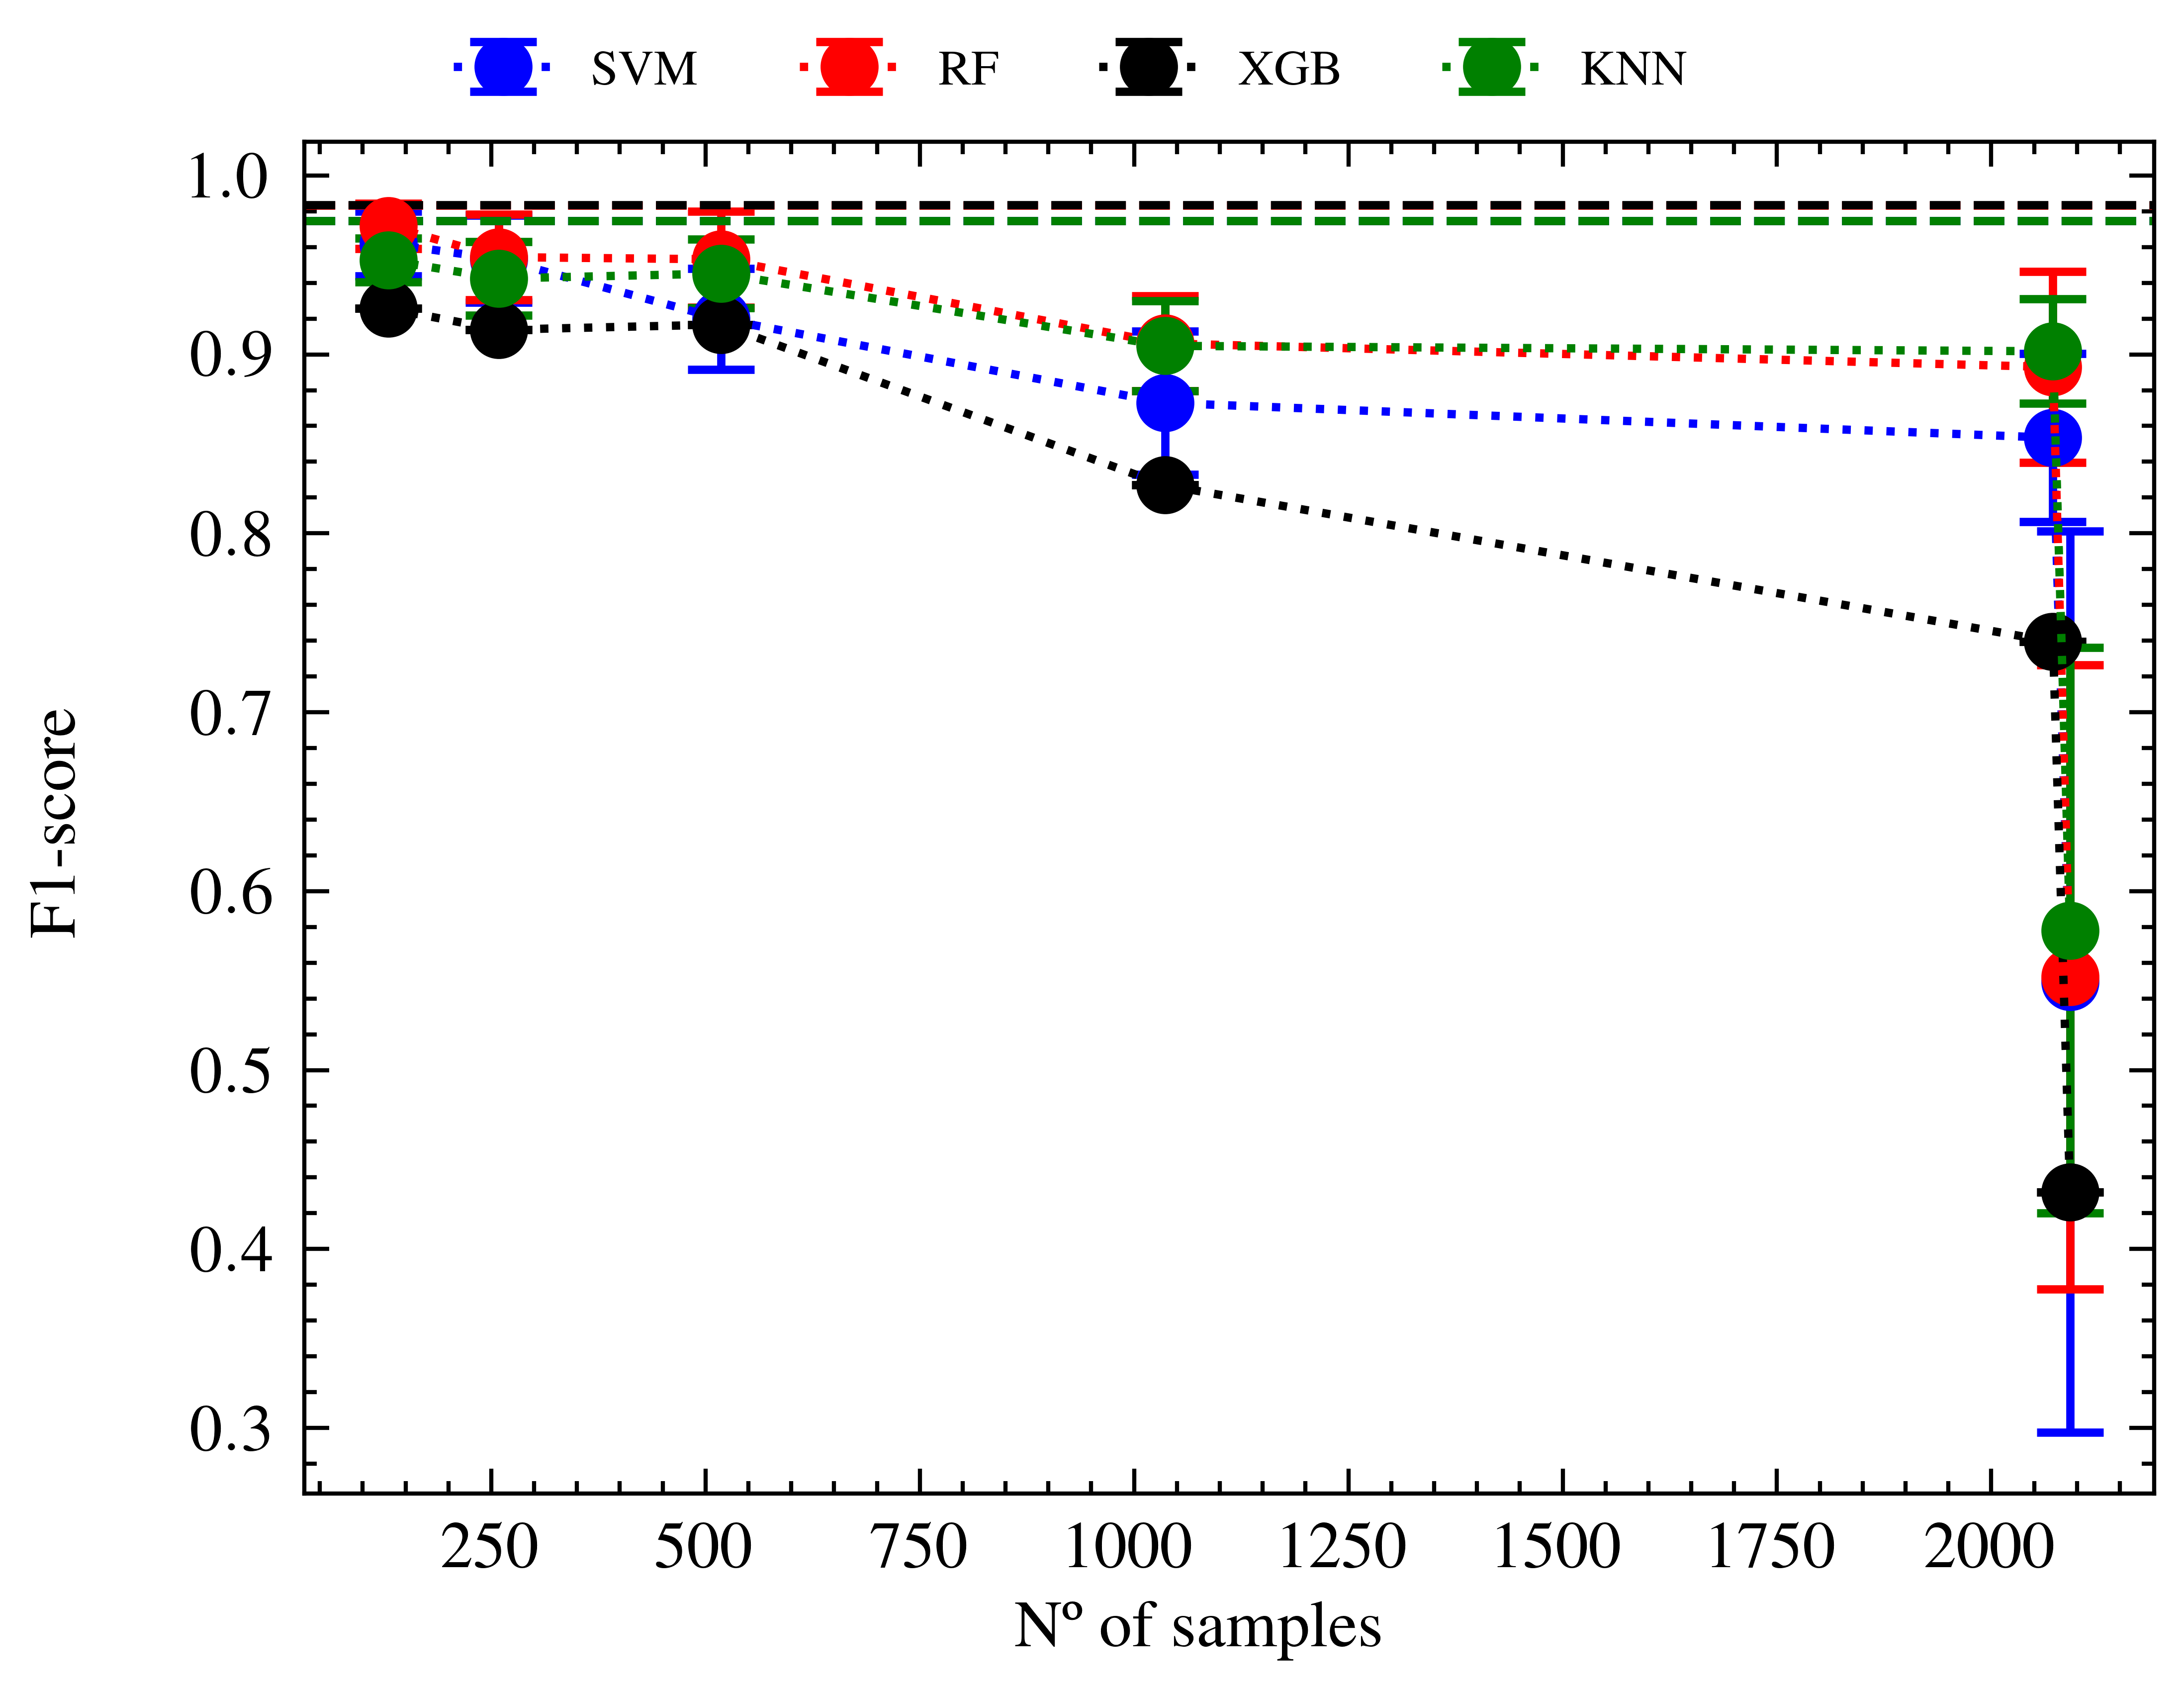

In [2]:

# FIGURE II - F1-Score versus data samples (Best abd worst cases) 
print("Generating and saving Figure 2...") 

fig, ax = plt.subplots(1, figsize=(4,3), dpi=1200)

# Set IEEE style 
plt.style.use(['science','ieee'])

# Iterating the dictionary to plot the correspondant contents   
for m in range(len(best_worst)) :  
    
    for i in range(len(models)):
        
        x_vector = np.zeros(len(sizes_keys)) # Vector to fill before plotting the errorbar
        y_vector = np.zeros(len(sizes_keys))
        err_vector = np.zeros(len(sizes_keys))
        
        for method in best_worst:
            
            for j in range(len(sizes_keys)):

                x_vector[j] = sizes[j]
                y_vector[j] = class_metrics[models[i]][best_worst[m]][sizes_keys[j]]['f1'].mean()
                err_vector[j] = class_metrics[models[i]][best_worst[m]][sizes_keys[j]]['f1'].std()

        ax.errorbar(x_vector, y_vector, err_vector, capsize = 4.0, linestyle=':', marker='o', color=model_colors[i])

# Set figure text 
fig.text(0.5, 0.04, 'Nº of samples', ha='center')
fig.text(0.01, 0.5, 'F1-score', va='center', rotation='vertical')

# Write the name of the chosen methods
#fig.text(0.20, 0.15, best_worst)
#fig.text(0.20, 0.55, best_worst[1])

# Remove x-labels
#ax.set_xticklabels([])

# Set legend 
ax.legend(models, bbox_to_anchor=(0.07,1.02,1,0.2), loc="lower left",
                mode="None", borderaxespad=0, ncol=4, prop={'size': 6})

# Plot the reference lines (Validation results without synthetic data)
ax.axhline(y=SVM_f1_nosynth, color='b', linestyle='--')  
ax.axhline(y=rf_f1_nosynth, color='r', linestyle='--') 
ax.axhline(y=xgb_f1_nosynth, color='k', linestyle='--') 
ax.axhline(y=knn_f1_nosynth, color='g', linestyle='--')  
              

name = dataset_name + "_f1_vs_data_samples_worst_case"
plt.savefig(name, dpi = 1200)


Generating and saving Figure 3...

Maximum upgrade in F1-Score using SVM is: -0.012858, using 'NC + CTGAN' SDG technique and 'quarter' amount of synthetic data
Maximum upgrade in F1-Score using RF is: -0.005885, using 'SVM-SMOTE + GC' SDG technique and 'quarter' amount of synthetic data
Maximum upgrade in F1-Score using XGB is: -0.026342, using 'SVM-SMOTE + GC' SDG technique and 'quarter' amount of synthetic data
Maximum upgrade in F1-Score using KNN is: -0.016687, using 'NC + GC' SDG technique and 'quarter' amound of synthetic data

Worst downgrade in F1-Score using SVM is: -0.427901, using 'SVM-SMOTE + CTGAN' SDG technique and 'only-synth' amount of synthetic data
Worst downgrade in F1-Score using RF is: -0.453202, using 'SVM-SMOTE + CTGAN' SDG technique and 'only-synth' amount of synthetic data
Worst downgrade in F1-Score using XGB is: -0.551788, using 'NC + CTGAN' SDG technique and 'only-synth' amount of synthetic data
Worst downgrade in F1-Score using KNN is: -0.433647, using 'SVM

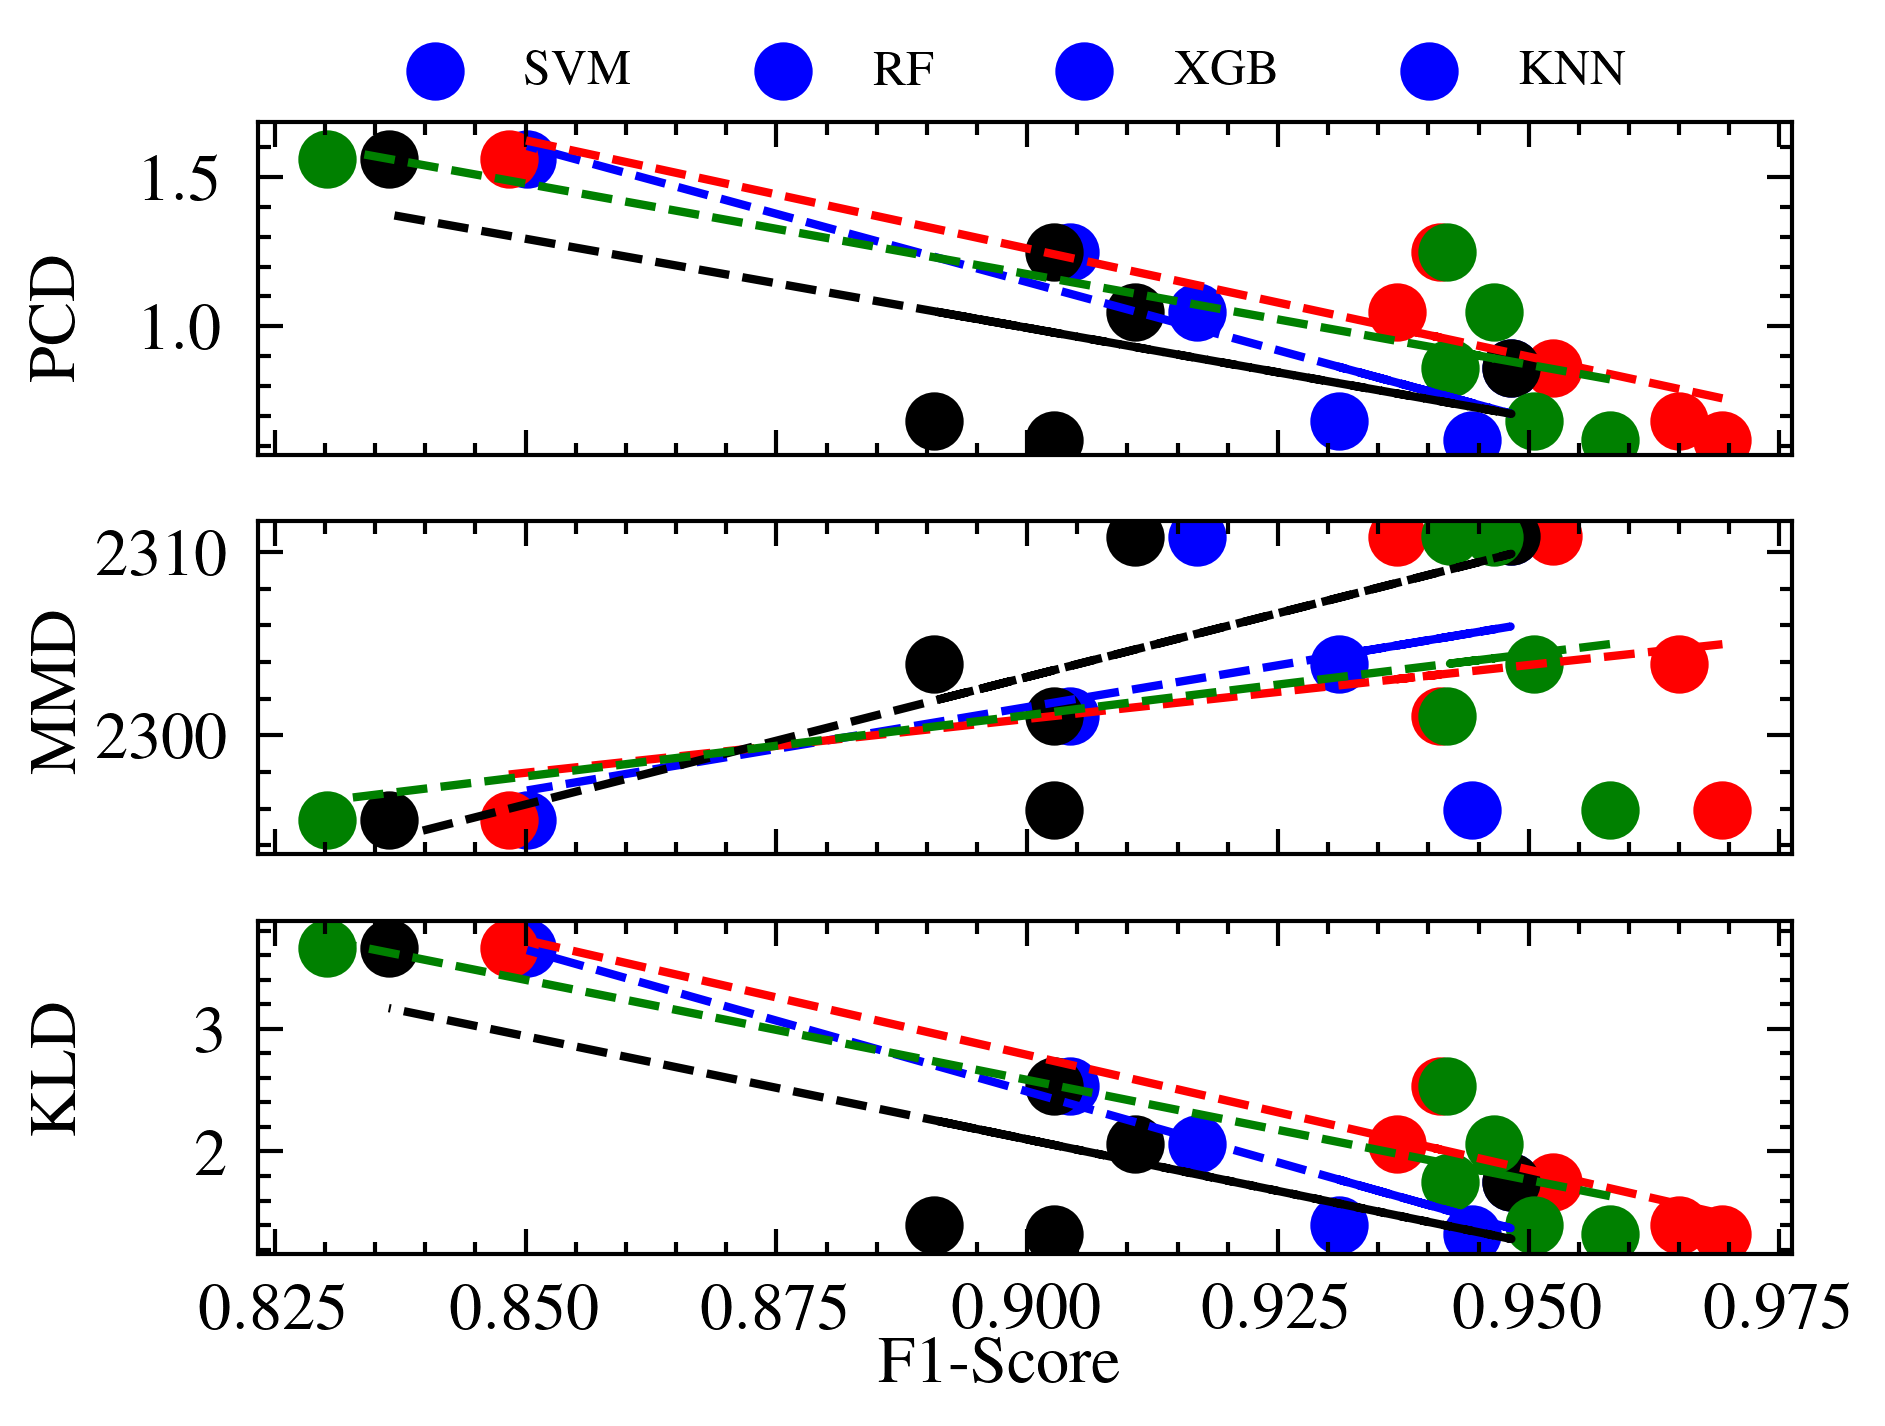

In [3]:

# FIGURE III: Metrics vs. F1-Score
print("Generating and saving Figure 3...") 

# Best combination: ADASYN + GC
best_method = "NC + GC"

fig, ax = plt.subplots(3)

plt.style.use(['science','ieee'])

for i in range(len(models)): 

    temp_f1  = np.zeros(len(sizes_keys)) # variable to generate polyfit
    temp_pcd  = np.zeros(len(sizes_keys)) 
    temp_mmd  = np.zeros(len(sizes_keys)) 
    temp_kld  = np.zeros(len(sizes_keys)) 

    for j in range(len(sizes_keys)): 
        
        for k in range(len(mets)):
            
            scatter1 = ax[k].scatter(class_metrics[models[i]][best_method][sizes_keys[j]]['f1'].mean(), 
                        sdg_metrics[best_method][sizes_keys[j]][mets[k]].mean(),
                        color = model_colors[i])            
    
        temp_f1[j] = class_metrics[models[i]][best_method][sizes_keys[j]]['f1'].mean()
        temp_pcd[j] = sdg_metrics[best_method][sizes_keys[j]]['PCD'].mean()
        temp_mmd[j] = sdg_metrics[best_method][sizes_keys[j]]['MMD'].mean()
        temp_kld[j] = sdg_metrics[best_method][sizes_keys[j]]['KLD'].mean()
    
    line = model_colors[i]+"--"

    z_pcd = np.polyfit(temp_f1, temp_pcd, 1)
    p_pcd = np.poly1d(z_pcd)
    ax[0].plot(temp_f1,p_pcd(temp_f1), line)

    z_mmd = np.polyfit(temp_f1, temp_mmd, 1)
    p_mmd = np.poly1d(z_mmd)
    ax[1].plot(temp_f1,p_mmd(temp_f1), line)

    z_kld = np.polyfit(temp_f1, temp_kld, 1)
    p_kld = np.poly1d(z_kld)
    ax[2].plot(temp_f1,p_kld(temp_f1), line)

# Set figure text 
fig.text(0.5, 0.04, 'F1-Score', ha='center')
fig.text(0.01, 0.75, 'PCD', va='center', rotation='vertical')
fig.text(0.01, 0.5, 'MMD', va='center', rotation='vertical')
fig.text(0.01, 0.25, 'KLD', va='center', rotation='vertical')

# Remove x-labels
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])

# Set legend 
ax[0].legend(models, bbox_to_anchor=(0.07,1.02,1,0.2), loc="lower left",
                mode="None", borderaxespad=0, ncol=4, prop={'size': 6})
# Save figure
name = dataset_name + "_sdg_metrics_vs_f1_score"
plt.savefig(name, dpi=600)

# Print the best upgrade and worst downgrade, the correspondant method and the percentage of used synthetic data 
all_combs = [comb1, comb2, comb3, comb4, comb5, comb6, comb7, comb8]

finals_f1 = list()

for model in models: 
    for comb in all_combs:
        
        a = list()

        for size in sizes_keys:   
            finals_f1.append([class_metrics[model][comb][size]['f1'].mean(), model, comb, size])

# Split lists into sublist of the different ML classifiers used 
svm_finals_f1 = list()
for idx in range(len(finals_f1)): 
    if 'SVM' in finals_f1[idx]: 
        svm_finals_f1.append(finals_f1[idx]) 

rf_finals_f1 = list()
for idx in range(len(finals_f1)): 
    if 'RF' in finals_f1[idx]: 
        rf_finals_f1.append(finals_f1[idx]) 

xgb_finals_f1 = list()
for idx in range(len(finals_f1)): 
    if 'XGB' in finals_f1[idx]: 
        xgb_finals_f1.append(finals_f1[idx]) 

knn_finals_f1 = list()
for idx in range(len(finals_f1)): 
    if 'KNN' in finals_f1[idx]: 
        knn_finals_f1.append(finals_f1[idx]) 


print("\nMaximum upgrade in F1-Score using SVM is: %f, using '%s' SDG technique and '%s' amount of synthetic data" % ((max(svm_finals_f1)[0] - SVM_f1_nosynth), max(svm_finals_f1)[2], max(svm_finals_f1)[3]))
print("Maximum upgrade in F1-Score using RF is: %f, using '%s' SDG technique and '%s' amount of synthetic data" % ((max(rf_finals_f1)[0] - rf_f1_nosynth), max(rf_finals_f1)[2], max(rf_finals_f1)[3]))
print("Maximum upgrade in F1-Score using XGB is: %f, using '%s' SDG technique and '%s' amount of synthetic data" % ((max(xgb_finals_f1)[0] - xgb_f1_nosynth), max(xgb_finals_f1)[2], max(xgb_finals_f1)[3]))
print("Maximum upgrade in F1-Score using KNN is: %f, using '%s' SDG technique and '%s' amound of synthetic data\n" % ((max(knn_finals_f1)[0] - knn_f1_nosynth), max(knn_finals_f1)[2], max(knn_finals_f1)[3]))

print("Worst downgrade in F1-Score using SVM is: %f, using '%s' SDG technique and '%s' amount of synthetic data" % ((min(svm_finals_f1)[0] - SVM_f1_nosynth), min(svm_finals_f1)[2], min(svm_finals_f1)[3]))
print("Worst downgrade in F1-Score using RF is: %f, using '%s' SDG technique and '%s' amount of synthetic data" % ((min(rf_finals_f1)[0] - rf_f1_nosynth), min(rf_finals_f1)[2], min(rf_finals_f1)[3]))
print("Worst downgrade in F1-Score using XGB is: %f, using '%s' SDG technique and '%s' amount of synthetic data" % ((min(xgb_finals_f1)[0] - xgb_f1_nosynth), min(xgb_finals_f1)[2], min(xgb_finals_f1)[3]))
print("Worst downgrade in F1-Score using KNN is: %f, using '%s' SDG technique and '%s' amount of synthetic data" % ((min(knn_finals_f1)[0] - knn_f1_nosynth), min(knn_finals_f1)[2], min(knn_finals_f1)[3]))